## IPython Notebook Test

A simple test for the `ipynbtest.py` file that tests IPython notebooks. It should also explain the basic functionality and command-line options. Use the command

```
ipynbtest.py --eval "denom=0" --timeout 2 --restart-if-fail 1 examples/ipynbtest_tutorial.ipynb
```

### Usage output
To get the help use
```
python ipynbtest.py -h
```
which outputs
```
usage: ipynbtest.py [-h] [--timeout TIMEOUT] [--rerun-if-timeout [RERUN]]
                    [--restart-if-fail [RESTART]] [--strict] [--eval [EVAL]]
                    [--pass-if-timeout] [--show-diff] [--abort-if-fail]
                    [--verbose]
                    file.ipynb

Run all cells in an ipython notebook as a test and check whether these
successfully execute and compares their output to the one inside the notebook

positional arguments:
  file.ipynb            the notebook to be checked

optional arguments:
  -h, --help            show this help message and exit
  --timeout TIMEOUT     the default timeout time in seconds for a cell
                        evaluation. Default is 300s (5mins). Note that travis
                        will consider it an error by default if after 600s
                        (10mins) no output is generated. So 600s is the
                        default limit by travis. However, a test cell that
                        takes this long should be split in more than one or
                        simplified.
  --rerun-if-timeout [RERUN]
                        if set then a timeout in a cell will cause to run the.
                        Default is 2 (means make up to 3 attempts)
  --restart-if-fail [RESTART]
                        if set then a fail in a cell will cause to restart the
                        full notebook!. Default is 0 (means NO rerun).Use this
                        with care.
  --strict              if set to true then the default test is that cell have
                        to match otherwise a diff will not be considered a
                        failed test
  --eval [EVAL]         the argument will be run before the first cell is
                        executed. This can be used to set specific values
                        without changing the notebook.
  --pass-if-timeout     if set then a timeout (after last retry) is considered
                        a passed test
  --show-diff           if set to true differences in the cell are shown in
                        `diff` style
  --abort-if-fail       if set to true then a fail will stop the whole test.
  --verbose             if set then text output is send to the console.
```

### simple example

This is fixed and will not cause a diff

In [1]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### show differences

```
--show-diff
```
This option will output a `diff`-like comparion of both cells to show what is different in the output. This will only be enabled for cell with text-like output, (e.g. text, html). It is automatically disabled for pictures and SVG.

### cell specific commands

You can start a cell with a hashbang `#!` and add some commands to it like
```
#! skip              : will not even execute a cell and just skip it
#! ignore            : will run the cell, but not fail if anything happens and just continue
#! timeout:[seconds] : will set the timeout for this cell to the given value
#! lazy              : will accept a cell with diffs, even in strict mode
#! strict            : will fail the cell if it has a diff
#! verbose           : will send the output (text) to the console
#! quiet             : will not send the output to the console even in verbose mode
```

This cell still passes, although it raises an exception

In [2]:
#! ignore
1/denom

NameError: name 'denom' is not defined

This cell is not run, although it is okay

### strict mode

```
  --strict
```
The strict mode only causes cell with differing output to fail. Default setting is that a diff is okay.

Note that UUIDs and hex adresses (usually memory adresses) are always replaced by a unique address so different memory addresses will not cause a diff

In [3]:
import uuid

This causes a diff

In [4]:
len(str(uuid.uuid1()))

36

In [5]:
#! verbose
uuid.uuid1()

UUID('fd6f4319-7feb-11e6-af1b-b8f6b1111687')

In [6]:
str(uuid.uuid4()).split('-')[0]

'd298563a'

This, however, is fine!

In [7]:
uuid.uuid4()

UUID('816c25c0-1fd9-4d75-a55a-41757a9d4331')

so is this

In [8]:
class A(object):
    pass

a = A()
a

#### Cause a time out and rerun

A timeout is caused if the evaluation of a cell takes too long. The default timeout happens after 300s or 5minutes. Keep in mind that usually notebooks are used also for illustrative purposes and therefore are similar to an integration test. This means that for once we want to keep the run time per cell short to make it a reasonable example that executes in acceptable time. Second purpose is to show that a combination of several cells in a typical test run should give expected results. So keep the evaluation of each cell short and focussed on a single thing to happen at a time.

Also, remember that travis has an internel timeout of 10 minutes (if not manually changed) and will stop a build if no results are received. Make sure that either your cell will send at least some results within 10 minutes if you extend the timeout beyond 600s (10mins).

Lastly, try to avoid that timeouts happen. This is an indication of a poor test or example design.

In [9]:
import time

In [10]:
timeout_first_run = True

In [11]:
if timeout_first_run:
    timeout_first_run = False
    time.sleep(3)
    print 'slow'
else:
    pass
    print 'fast'

slow


Just check that multiple mixed output is treated correctly.

In [12]:
print '1'
2 + 3

1


5

Make an image and check if it can be tested.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

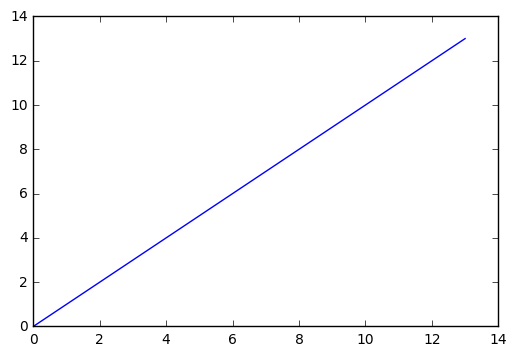

In [14]:
plt.plot(range(random.randint(5,20)))

Write something to stderr and see the result in `--verbose` mode.

In [15]:
import sys

In [16]:
sys.stderr.write(
    'This should be displayed. But not tested for.\n So the cell is always the same.\n'
    '%d' % random.randint(0, 1000)
)

This should be displayed. But not tested for.
 So the cell is always the same.
106

#### Cause a fail and restart

The option
```
--restart-if-fail [max-number-of-restarts, default:0]
```
will cause to restart the whole notebook in a fresh kernel, if a cell executed with `fail`. Here fail means whatever you declared to be a `fail`. In `strict` mode also a difference in output will cause a restart.

Also here. Be careful using this option. It is again usually a sign of poor example design should it be possible to fail, if there is no error, but some rando results involved that are not what is "hoped" for and thus cause a fail.
Make sure that given the correct conditions (previous cells, etc...) a cell passes.